## Descriptive statistics

### 1. Import clean data set

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib as plt
import seaborn as sn
import scipy as sp

In [2]:
fpath = r'C:\Users\Mei\City-Bikes'

In [3]:
df_clean1 = pd.read_pickle(os.path.join(fpath,'clean_data','citibike_clean_1.pkl'))

In [4]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   trip_id                  50000 non-null  object        
 1   bike_id                  50000 non-null  object        
 2   weekday                  50000 non-null  object        
 3   start_hour               50000 non-null  int64         
 4   start_time               50000 non-null  datetime64[ns]
 5   start_station_id         50000 non-null  object        
 6   start_station_name       50000 non-null  object        
 7   start_station_latitude   50000 non-null  float64       
 8   start_station_longitude  50000 non-null  float64       
 9   end_time                 50000 non-null  datetime64[ns]
 10  end_station_id           50000 non-null  object        
 11  end_station_name         50000 non-null  object        
 12  end_station_latitude     50000 n

## 2. Consistency further check 
### Count values of each qualitative variable

In [5]:
df_clean1['gender'].value_counts()

1    32361
2    10658
0     6981
Name: gender, dtype: int64

In [6]:
df_clean1['birth_year'].value_counts()

1985.0    1837
1981.0    1830
1982.0    1810
1984.0    1798
1983.0    1785
          ... 
1929.0       1
1917.0       1
1926.0       1
1924.0       1
1921.0       1
Name: birth_year, Length: 76, dtype: int64

In [7]:
df_clean1['weekday'].value_counts()

Mon    7715
Sun    7319
Fri    7309
Wed    7228
Tue    7065
Thu    6857
Sat    6507
Name: weekday, dtype: int64

In [8]:
df_clean1['trip_id'].value_counts()

LnQzQk    1
Yo1xlq    1
8WSVPz    1
weSDiK    1
dTLGBn    1
         ..
ZM2cqW    1
8eSnBi    1
sF86jK    1
Mm44Sa    1
4ZmicF    1
Name: trip_id, Length: 50000, dtype: int64

In [9]:
df_clean1['bike_id'].value_counts()

16188    93
20118    91
18278    90
19755    85
17796    85
         ..
14733     5
18603     4
16964     3
15220     2
19465     2
Name: bike_id, Length: 996, dtype: int64

In [10]:
df_clean1['end_station_latitude'].value_counts()

40.737050    572
40.746745    525
40.717548    470
40.750450    439
40.730287    430
            ... 
40.696089     10
40.684568      9
40.698921      7
40.694528      7
40.705312      6
Name: end_station_latitude, Length: 330, dtype: int64

### No inconsistencies are found regarding the expressions for each qualitative variable

## 3. Descriptive statistics

### 3.1 General statistics of all the quantitative variables

In [11]:
df_clean1.describe()

,start_hour,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,trip_duration,birth_year
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,43021.000000
mean,14.145240,40.734170,-73.991109,40.733859,-73.991351,838.982900,1975.627786
std,4.860541,0.019911,0.012555,0.019885,0.012569,573.663997,11.089001
min,0.000000,40.680342,-74.017134,40.680342,-74.017134,60.000000,1899.000000
25%,10.000000,40.720196,-74.000271,40.720196,-74.001547,417.000000,1968.000000
50%,15.000000,40.735877,-73.990765,40.735354,-73.991218,672.000000,1978.000000
75%,18.000000,40.750020,-73.981923,40.749013,-73.982050,1112.000000,1984.000000
max,23.000000,40.770513,-73.950048,40.770513,-73.950048,2697.000000,1997.000000


### 3.2 Freuency study of relevant variables 

In [12]:
count_starthour = df_clean1.groupby(['start_hour'])['start_hour'].count()

<AxesSubplot:xlabel='start_hour'>

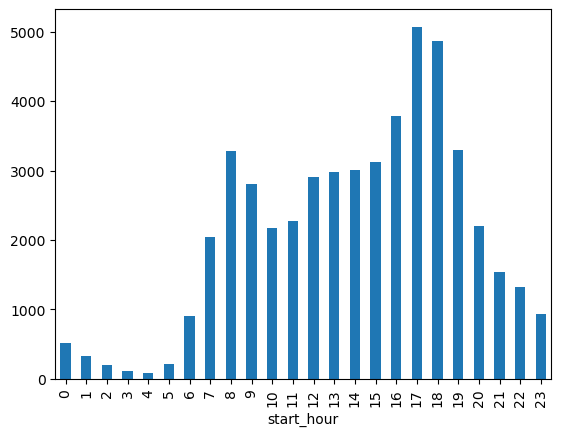

In [13]:
count_starthour.plot.bar()

<AxesSubplot:xlabel='weekday'>

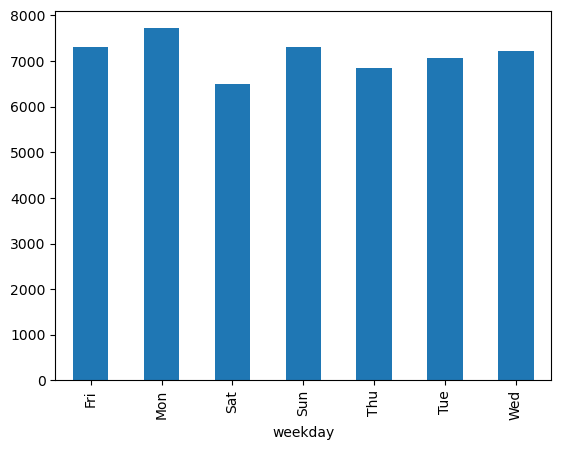

In [14]:
count_weekday = df_clean1.groupby(['weekday'])['weekday'].count()
count_weekday.plot.bar()

<AxesSubplot:xlabel='gender'>

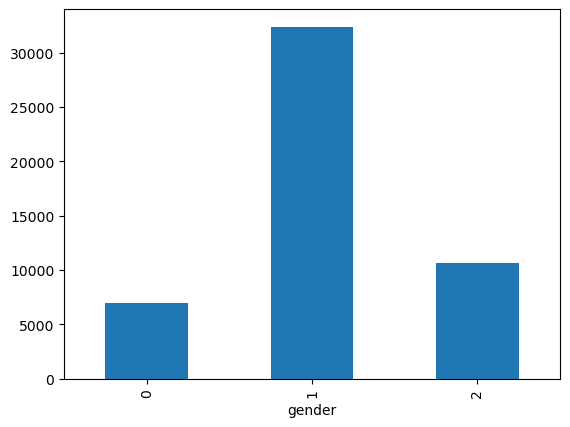

In [15]:
count_gender = df_clean1.groupby(['gender'])['gender'].count()
count_gender.plot.bar()

In [16]:
df_nonnull = df_clean1.dropna()

In [17]:
df_nonnull['birth_year'] = df_nonnull['birth_year'].astype(int)

C:\Users\Mei\AppData\Local\Temp\ipykernel_7032\1669921750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonnull['birth_year'] = df_nonnull['birth_year'].astype(int)


In [18]:
df_nonnull.head(2)

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968,2
1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983,1


<AxesSubplot:xlabel='birth_year'>

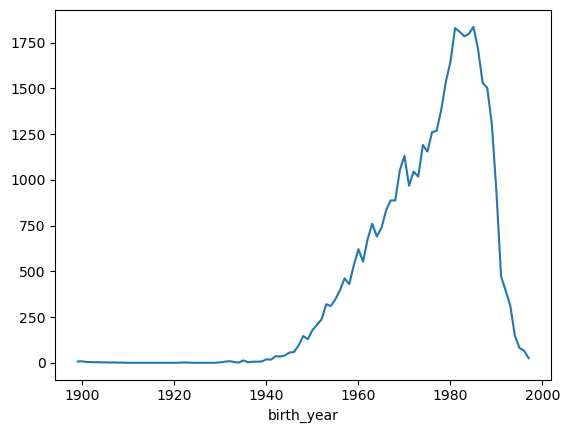

In [19]:
count_birthyear = df_nonnull.groupby(['birth_year'])['birth_year'].count()
count_birthyear.plot()

### 3.3 Histogram of 'trip_duration'
##### two methods

In [20]:
import matplotlib.pyplot as pltt

(array([ 240.,  435.,  699., 1022., 1457., 1710., 1900., 2057., 2030.,
        1986., 2045., 1990., 1893., 1820., 1744., 1557., 1494., 1431.,
        1252., 1235., 1147., 1041.,  982., 1018.,  894.,  903.,  792.,
         763.,  699.,  692.,  667.,  618.,  637.,  569.,  581.,  507.,
         508.,  471.,  415.,  368.,  395.,  347.,  327.,  288.,  292.,
         264.,  269.,  243.,  192.,  203.,  184.,  173.,  140.,  153.,
         126.,  125.,  117.,   90.,   89.,   87.,   78.,   82.,   70.,
          63.,   63.,   56.,   52.,   58.,   51., 1054.]),
 array([  60.        ,   97.67142857,  135.34285714,  173.01428571,
         210.68571429,  248.35714286,  286.02857143,  323.7       ,
         361.37142857,  399.04285714,  436.71428571,  474.38571429,
         512.05714286,  549.72857143,  587.4       ,  625.07142857,
         662.74285714,  700.41428571,  738.08571429,  775.75714286,
         813.42857143,  851.1       ,  888.77142857,  926.44285714,
         964.11428571, 1001.78571429

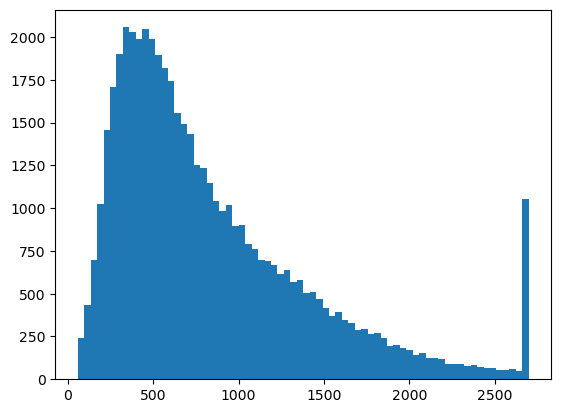

In [21]:
pltt.hist(x = df_clean1['trip_duration'],bins = 'auto')

<AxesSubplot:ylabel='Frequency'>

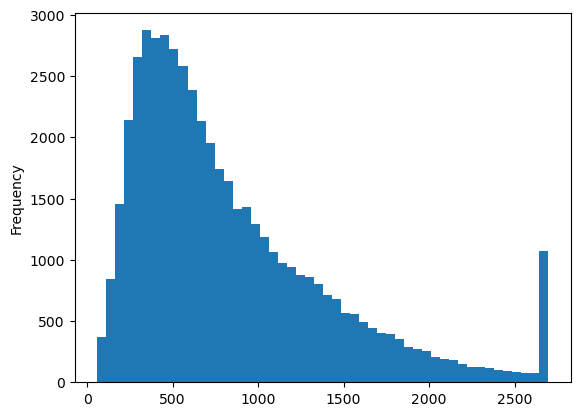

In [22]:
df_clean1['trip_duration'].plot.hist(bins = 50)